In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as PLT
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [19]:
(X_train,Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train, X_test = X_train/255, X_test/255
X_train, X_test = np.expand_dims(X_train, axis=3), np.expand_dims(X_test, axis=3)

In [25]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
model = Sequential([
    ZeroPadding2D(padding=(1,1), input_shape=(28,28,1)),
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(64, 3, strides=1, activation='relu', padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
Y_train_OneHotEncode = to_categorical(Y_train)
Y_test_OneHotEncode = to_categorical(Y_test)

In [11]:
history = model.fit(
        X_train,Y_train_OneHotEncode,
        epochs=2,
        validation_data=(X_test,Y_test_OneHotEncode),
        batch_size=300
)

Epoch 1/2
200/200 [==============================] - 145s 724ms/step - loss: 0.8235 - accuracy: 0.7892 - val_loss: 0.4006 - val_accuracy: 0.8974
Epoch 2/2
200/200 [==============================] - 170s 849ms/step - loss: 0.2147 - accuracy: 0.9365 - val_loss: 0.1482 - val_accuracy: 0.9583


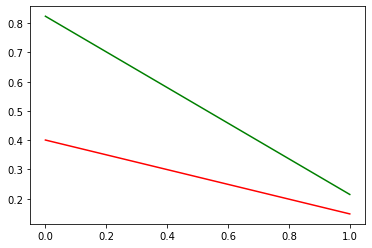

In [12]:
PLT.plot(history.history['loss'], color='green', label='train data')
PLT.plot(history.history['val_loss'], color='red', label='test data')

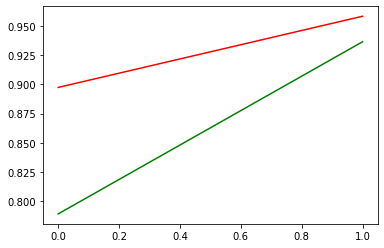

In [13]:
PLT.plot(history.history['accuracy'], color='green', label='train data')
PLT.plot(history.history['val_accuracy'], color='red', label='test data')

# DropOut
###  deactive some random noron for no overfiting

In [42]:
model = Sequential([
    ZeroPadding2D(padding=(1,1), input_shape=(28,28,1)),
    Conv2D(2, 3, strides=1, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(2, 3, strides=1, activation='relu', padding='same'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(
        X_train,Y_train_OneHotEncode,
        epochs=2,
        validation_data=(X_test,Y_test_OneHotEncode),
        batch_size=6000
)

Epoch 1/2
10/10 [==============================] - 13s 1s/step - loss: 2.2956 - accuracy: 0.1327 - val_loss: 2.2226 - val_accuracy: 0.3063
Epoch 2/2
10/10 [==============================] - 14s 1s/step - loss: 2.1660 - accuracy: 0.2527 - val_loss: 2.1202 - val_accuracy: 0.4624


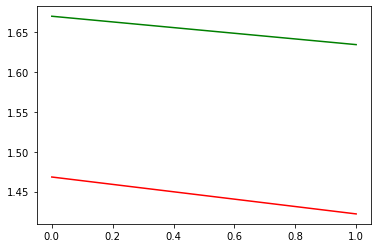

In [38]:
PLT.plot(history.history['loss'], color='green', label='train data')
PLT.plot(history.history['val_loss'], color='red', label='test data')

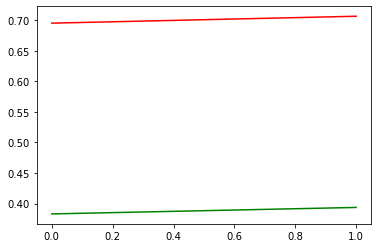

In [39]:
PLT.plot(history.history['accuracy'], color='green', label='train data')
PLT.plot(history.history['val_accuracy'], color='red', label='test data')

In [33]:
model.save('tf-cnn-mnist.m74')

INFO:tensorflow:Assets written to: tf-cnn-mnist.m74/assets


INFO:tensorflow:Assets written to: tf-cnn-mnist.m74/assets
